In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data = "wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv"

In [3]:
!wget $data

--2023-09-25 21:08:35--  http://wget/
Resolving wget (wget)... failed: Name or service not known.
wget: unable to resolve host address ‘wget’
--2023-09-25 21:08:35--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.36M  --.-KB/s    in 0.07s   

2023-09-25 21:08:35 (18.2 MB/s) - ‘housing.csv’ saved [1423529/1423529]

FINISHED --2023-09-25 21:08:35--
Total wall clock time: 0.3s
Downloaded: 1 files, 1.4M in 0.07s (18.2 MB/s)


In [4]:
df = pd.read_csv('housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


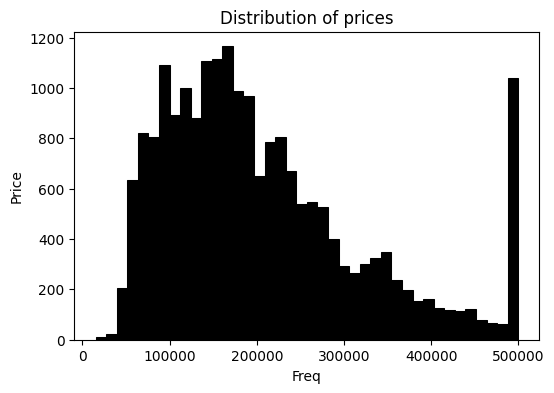

In [ ]:
plt.figure(figsize=(6, 4))

sns.histplot(df.median_house_value, bins=40, color='black', alpha=1)
plt.ylabel('Price')
plt.xlabel('Freq')
plt.title('Distribution of prices')

plt.show()

In [ ]:
df_new = ( df[
           df['ocean_proximity'] == "1H OCEAN"or
           df['ocean_proximity'] == "INLAND"])

ValueError: ignored

In [5]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns
string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [ ]:
df['ocean_proximity'].unique()
df[df['ocean_proximity']=="<1h_ocean"]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1h_ocean
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1h_ocean
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1h_ocean
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1h_ocean
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1h_ocean
...,...,...,...,...,...,...,...,...,...,...
20502,-118.68,34.33,45.0,121.0,25.0,67.0,27.0,2.9821,325000.0,<1h_ocean
20503,-118.75,34.33,27.0,534.0,85.0,243.0,77.0,8.2787,330000.0,<1h_ocean
20504,-118.73,34.29,11.0,5451.0,736.0,2526.0,752.0,7.3550,343900.0,<1h_ocean
20505,-118.72,34.29,22.0,3266.0,529.0,1595.0,494.0,6.0368,248000.0,<1h_ocean


In [132]:
house_type = ["inland","<1h_ocean"]
df_new = df[df['ocean_proximity'].isin(house_type)]
df_new
df_new['ocean_proximity'].unique()
df_new.isnull().sum()
df_new.population.describe()

count    15687.000000
mean      1466.317205
std       1180.389908
min          3.000000
25%        802.000000
50%       1195.000000
75%       1777.000000
max      35682.000000
Name: population, dtype: float64

In [8]:
np.random.seed(42)

n = len(df_new)
print(n)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df_new.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

15687


In [14]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-119.14,36.23,22.0,2935.0,523.0,1927.0,530.0,2.5875,70400.0,inland
1,-117.79,34.12,16.0,2426.0,426.0,1319.0,446.0,4.8125,224500.0,inland
2,-117.97,33.68,26.0,3653.0,568.0,1930.0,585.0,5.7301,260900.0,<1h_ocean
3,-118.03,34.10,32.0,2668.0,609.0,1512.0,541.0,2.9422,233100.0,inland
4,-121.87,37.34,39.0,2479.0,541.0,1990.0,506.0,2.4306,289100.0,<1h_ocean
...,...,...,...,...,...,...,...,...,...,...
9408,-119.15,34.44,33.0,2005.0,392.0,1043.0,351.0,5.3080,297900.0,<1h_ocean
9409,-119.13,36.13,28.0,1673.0,385.0,1434.0,371.0,2.0586,40900.0,inland
9410,-118.08,34.13,46.0,1238.0,147.0,377.0,145.0,8.4546,500001.0,inland
9411,-118.46,34.29,24.0,3668.0,890.0,3151.0,810.0,3.0526,183300.0,<1h_ocean


In [15]:
y_train_orig = df_train.median_house_value
y_val_orig = df_val.median_house_value
y_test_orig = df_test.median_house_value

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']



In [16]:
y_train_orig


0        70400.0
1       224500.0
2       260900.0
3       233100.0
4       289100.0
          ...   
9408    297900.0
9409     40900.0
9410    500001.0
9411    183300.0
9412    276300.0
Name: median_house_value, Length: 9413, dtype: float64

In [26]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [18]:
df_train.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
ocean_proximity        object
dtype: object

In [114]:
base = ['housing_median_age','total_rooms','total_bedrooms']




In [101]:
def prepare_X(df):
    df = df.copy()
    features=base.copy()

    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [43]:
def prepare_X_mean(df):

    df_num = df[base]
    mean_value = df.total_bedrooms.mean()
    df['total_bedrooms'] = df.total_bedrooms.fillna(mean_value)
    X = df_num.values
    return X

In [44]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

In [45]:
y_pred = w_0 + X_train.dot(w)

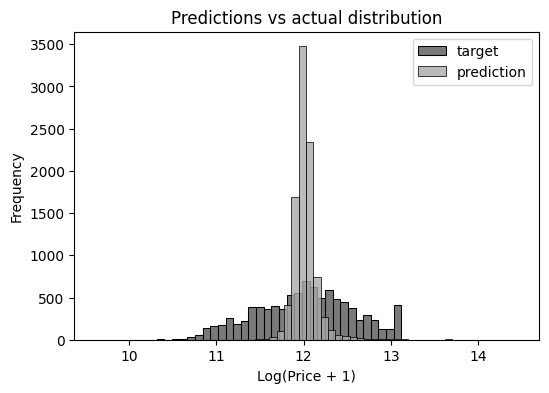

In [46]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [127]:
def rmse(y_train,y_pred):
  error = y_train - y_pred
  se = error ** 2
  mse = se.mean()
  score = np.sqrt(mse)
  return score

In [48]:
rmse(y_train, y_pred)

0.55

In [49]:
X_train = prepare_X_mean(df_train)
w_0, w = train_linear_regression(X_train, y_train)
y_pred = w_0 + X_train.dot(w)



In [50]:
rmse(y_train, y_pred)

0.55

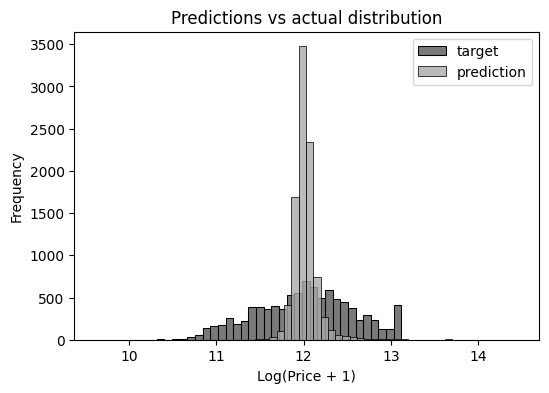

In [51]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

**Regularization**

In [144]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [53]:
X_train = prepare_X(df_train)

In [54]:
X_train = prepare_X(df_train)


for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_train.dot(w)
    print('%6s' %r, rmse(y_train, y_pred))

     0 0.55
 1e-06 0.55
0.0001 0.55
 0.001 0.55
  0.01 0.55
   0.1 0.55
     1 0.55
     5 0.55
    10 0.55


Question 5

In [140]:

def run_random(seed_list,n_val,n_test,n_train,idx,n):

  print(seed_list)

  score_list = []
  for i in seed_list:
    np.random.seed(i)



    np.random.shuffle(idx)

    df_shuffled = df_new.iloc[idx]

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)


    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)

    y_test = np.log1p(df_test.median_house_value.values)

    del df_train['median_house_value']
    del df_test['median_house_value']



    ##
    X_train = prepare_X(df_train)
    w_0, w = train_linear_regression(X_train, y_train)

    X_val = prepare_X(df_val)
    y_pred = w_0 + X_val.dot(w)

    ## rmse
    score = rmse(y_val, y_pred)
    score_list.append(score)
  return score_list








In [141]:
n = len(df_new)
idx = np.arange(n)


n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)
seed_list = [0,1,2,3,4,5,6,7,8,9]
sc_li = run_random(seed_list,n_val,n_test,n_train,idx,n)
print(sc_li)
std= np.array(sc_li).std()
print(std)
print(round(std, 3))


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0.5416993542511553, 0.5525424334154584, 0.5389189677188923, 0.5481227659708716, 0.5387065893268417, 0.545694081388054, 0.5416736943167125, 0.5483254146352905, 0.5412920734126635, 0.559680828885338]
0.0063369519174479375
0.006


In [139]:
n = 5
seed_list = [0,1,2,3,4,5,6,7,8,9]

idx = np.arange(n)
for i in seed_list:
    np.random.seed(i)




    np.random.shuffle(idx)
    print(idx)



[2 0 1 3 4]
[1 0 4 2 3]
[4 3 0 2 1]
[2 1 3 4 0]
[2 4 1 0 3]
[3 2 4 1 0]
[1 0 3 2 4]
[1 2 3 0 4]
[4 3 2 1 0]
[1 4 3 2 0]


**Question6**

In [145]:
def question6():
  n = len(df_new)
  idx = np.arange(n)
  score_list = []
  np.random.seed(9)
  n_val = int(0.2 * n)
  n_test = int(0.2 * n)
  n_train = n - (n_val + n_test)


  np.random.shuffle(idx)

  df_shuffled = df_new.iloc[idx]

  df_train = df_shuffled.iloc[:n_train+n_val].copy()
  df_test = df_shuffled.iloc[n_train+n_val:].copy()

  y_train = np.log1p(df_train.median_house_value.values)

  y_test = np.log1p(df_test.median_house_value.values)

  del df_train['median_house_value']
  del df_test['median_house_value']


    ##
  X_train = prepare_X(df_train)
  w_0, w = train_linear_regression_reg(X_train,y_train,r=0.001)

  X_test = prepare_X(df_test)
  y_pred = w_0 + X_test.dot(w)

    ## rmse
  score = rmse(y_test, y_pred)

  print(score)




In [146]:
question6()

0.5433276423446888
